
## Introduction to Faceting


---

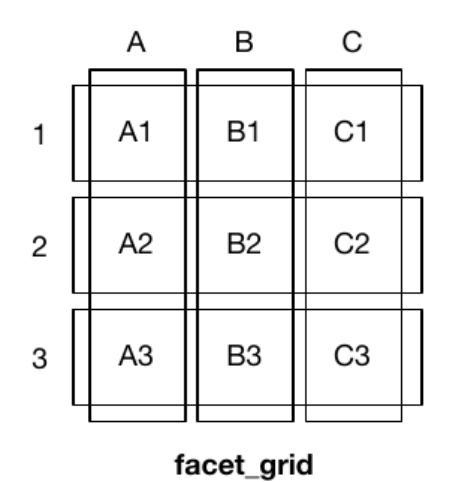

Faceting is a powerful visualization technique that allows for the effective handling and comparison of plots involving two or more variables. By dividing the data into disjoint subsets, typically based on different levels of a categorical variable, faceting enables the creation of multiple plots that illustrate the same relationship or distribution across these subsets. This approach is especially valuable in multivariate visualization, where the goal is to compare distributions or relationships across levels of additional variables. Even in the context of bivariate plots, faceting proves to be a useful method for gaining insights from complex datasets.

For instance, instead of depicting the relationship between one numeric variable and one categorical variable using a box plot or violin plot, faceting can be employed to visualize histograms of the numeric variable for different levels of the categorical variable. This allows for a clearer comparison across the different categories. Seaborn's `FacetGrid` class is a convenient tool for creating faceted plots in Python. The process involves two main steps: first, creating an instance of the `FacetGrid` object and specifying the feature to facet by (such as vehicle class), and second, using the `map` method on the `FacetGrid` object to specify the plot type and variable(s) to be plotted in each subset (e.g., a histogram of combined fuel efficiency).

Faceting provides a structured way to explore and compare multiple dimensions of data, making it an essential technique for data analysts and researchers.

### References

-   Matplotlib documentation. (n.d.). FacetGrid. Retrieved from https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
-   Waskom, M. L. (2021). Seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021. [https://doi.org/10.21105/joss.03021](https://doi.org/10.21105/joss.03021)
- https://ggplot2-book.org/facet
- https://towardsdatascience.com/visualize-your-data-with-facets-d11b085409bc



Let's use a practical example of faceting with a dataset containing information about car specifications, such as miles per gallon (MPG), horsepower, and the origin of the cars (USA, Europe, or Japan).

We can use the seaborn library in Python to demonstrate faceting. Here's how you can do it:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Calling the constructor requires a long-form data object. This initializes the grid, but doesn’t plot anything on it

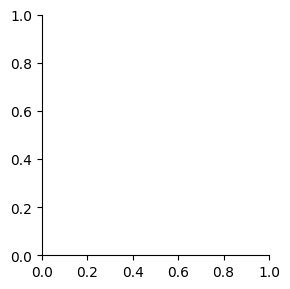

In [ ]:
tips = sns.load_dataset("tips")

sns.FacetGrid(tips);

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Assign column and/or row variables to add more subplots to the figure:

In [ ]:
tips['smoker'].unique()
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

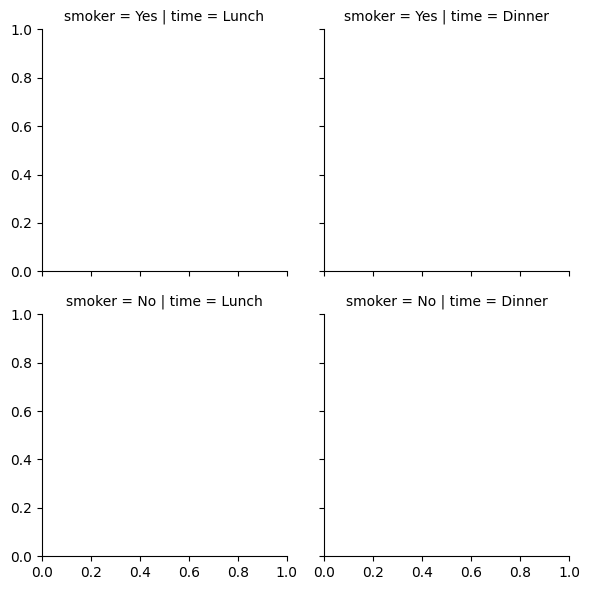

In [ ]:
sns.FacetGrid(tips, col="time", row="smoker");


To draw a plot on every facet, pass a function and the name of one or more columns in the dataframe to `FacetGrid.map():`

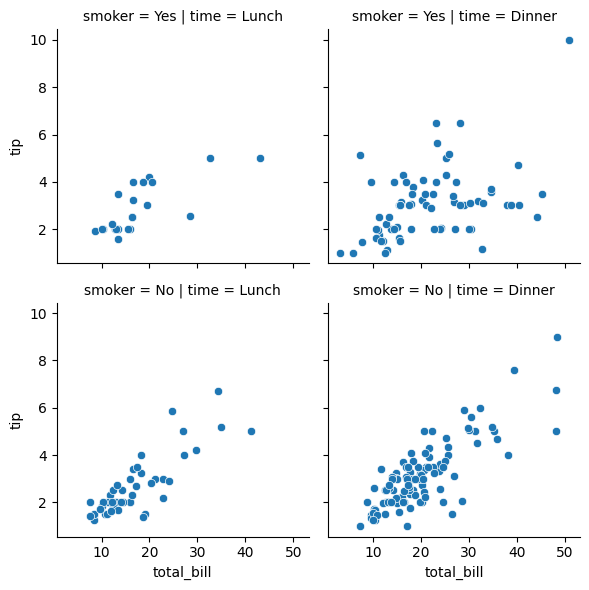

In [ ]:
g= sns.FacetGrid(tips, col="time",  row="smoker")
g.map(sns.scatterplot, "total_bill", "tip");

The variable specification in `FacetGrid.map()` requires a positional argument mapping, but if the function has a data parameter and accepts named variable assignments, you can also use `FacetGrid.map_dataframe():`

## Faceting under the hood

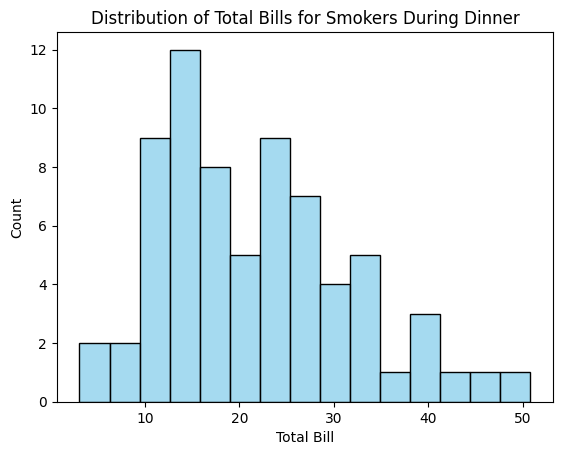

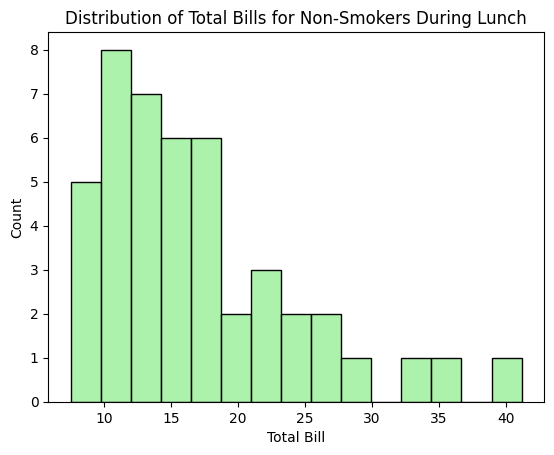

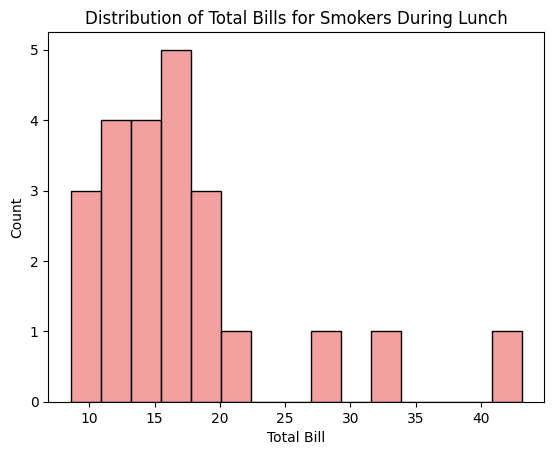

In [ ]:
# Filter the dataframe manually for smokers during dinner
df_smoker_yes_time_dinner = tips[(tips['smoker']=='Yes') & (tips['time']=='Dinner')]
# Plot the histogram for the filtered data
sns.histplot(df_smoker_yes_time_dinner['total_bill'], bins=15, color="skyblue")
plt.xlabel("Total Bill")
plt.ylabel("Count")
plt.title("Distribution of Total Bills for Smokers During Dinner")
plt.show()

# Filter the dataframe manually for non-smokers during lunch
df_smoker_no_time_lunch = tips[(tips['smoker']=='No') & (tips['time']=='Lunch')]
# Plot the histogram for the filtered data
sns.histplot(df_smoker_no_time_lunch['total_bill'], bins=15, color="lightgreen")
plt.xlabel("Total Bill")
plt.ylabel("Count")
plt.title("Distribution of Total Bills for Non-Smokers During Lunch")
plt.show()

# Filter the dataframe manually for smokers during lunch
df_smoker_yes_time_lunch = tips[(tips['smoker']=='Yes') & (tips['time']=='Lunch')]
# Plot the histogram for the filtered data
sns.histplot(df_smoker_yes_time_lunch['total_bill'], bins=15, color="lightcoral")
plt.xlabel("Total Bill")
plt.ylabel("Count")
plt.title("Distribution of Total Bills for Smokers During Lunch")
plt.show()


## The same using Facetgrid

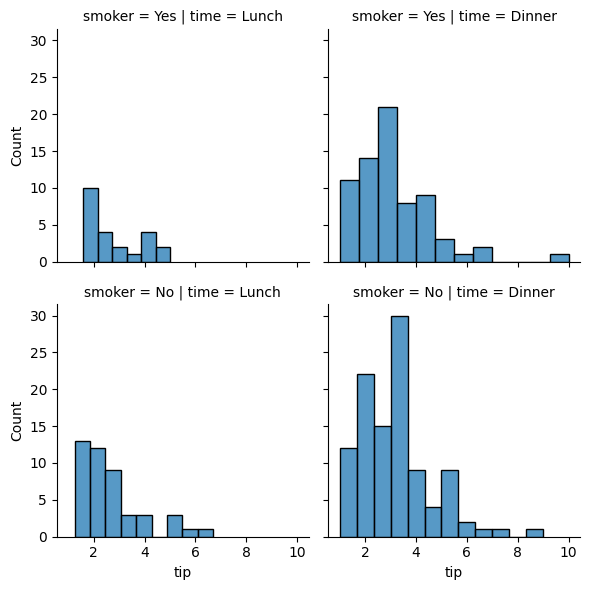

In [ ]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g.map_dataframe(sns.histplot, x="tip");

Notice how the bins have different widths in each facet. A separate plot is drawn on each facet, so if the plotting function derives any parameters from the data, they may not be shared across facets. You can pass additional keyword arguments to synchronize them. But when possible, using a figure-level function like `displot()` will take care of this bookkeeping for you:

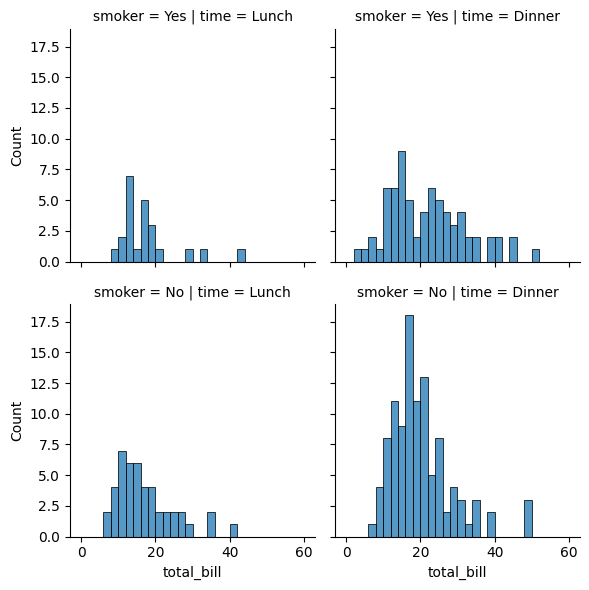

In [ ]:
g = sns.FacetGrid(tips, col="time", row="smoker", sharey=True)
g.map_dataframe(sns.histplot, "total_bill", binwidth=2, binrange=(0, 60));

he FacetGrid constructor accepts a `hue` parameter. Setting this will condition the data on another variable and make multiple plots in different colors. Where possible, label information is tracked so that a single legend can be drawn:

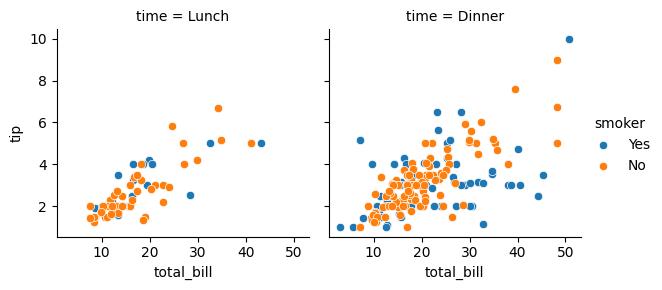

In [ ]:
g = sns.FacetGrid(tips, col="time", hue="smoker")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip");
g.add_legend();

When hue is set on the FacetGrid, however, a separate plot is drawn for each level of the variable. If the plotting function understands hue, it is better to let it handle that logic. But it is important to ensure that each facet will use the same `hue` mapping. In the sample tips data, the `sex` column has a categorical datatype, which ensures this. Otherwise, you may want to use the `hue_order` or similar parameter:

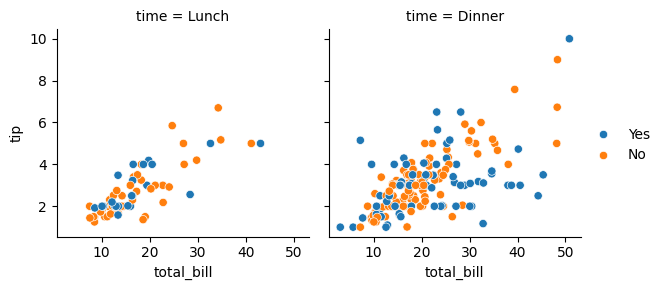

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="smoker")
g.add_legend();

The size and shape of the plot is specified at the level of each subplot using the height and aspect parameters:

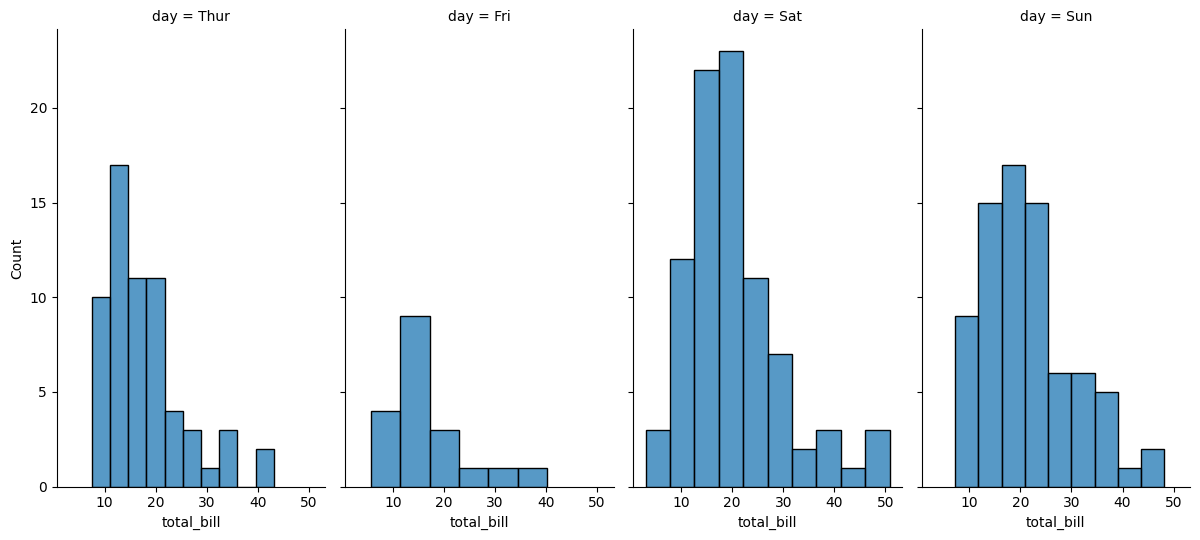

In [ ]:
g = sns.FacetGrid(tips, col="day", height=5.5, aspect=.55)
g.map(sns.histplot, "total_bill");

If the variable assigned to col has many levels, it is possible to “wrap” it so that it spans multiple rows::

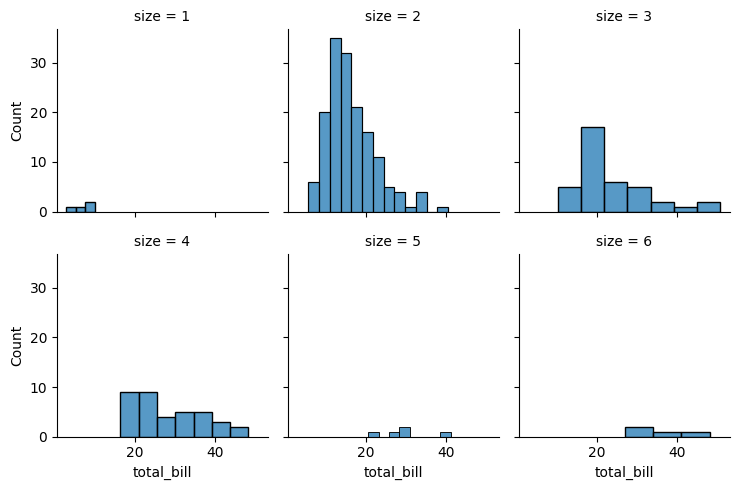

In [ ]:
g = sns.FacetGrid(tips, col="size", height=2.5, col_wrap=3)
g.map(sns.histplot, "total_bill")

To add horizontal or vertical reference lines on every facet, use `FacetGrid.refline()`:



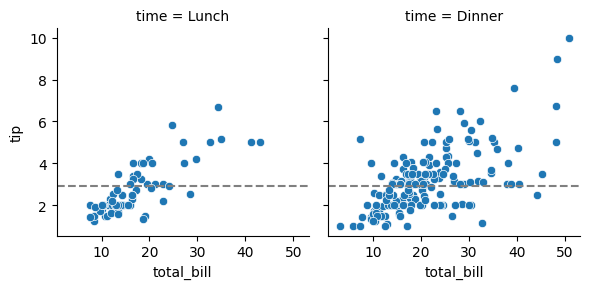

In [ ]:
g = sns.FacetGrid(tips, col="time",margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.refline(y=tips["tip"].median())

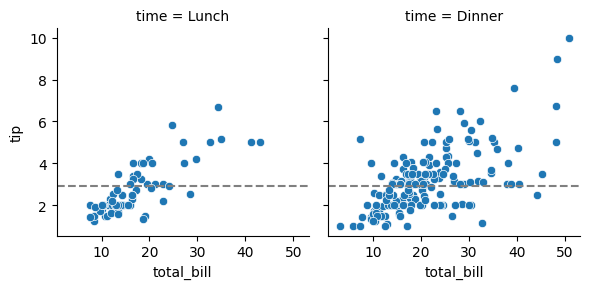

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.refline(y=tips["tip"].median())

You can pass custom functions to plot with, or to annotate each facet. Your custom function must use the matplotlib state-machine interface to plot on the `“current”` axes, and it should catch additional keyword arguments:

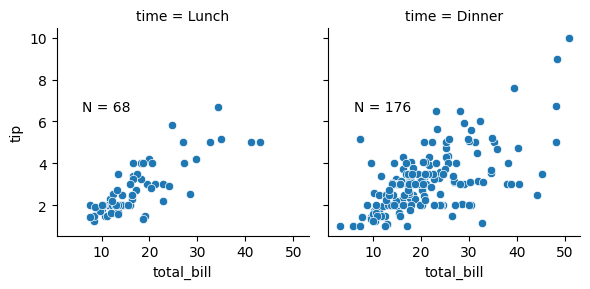

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.map_dataframe(annotate)

The `FacetGrid` object has some other useful parameters and methods for tweaking the plot:

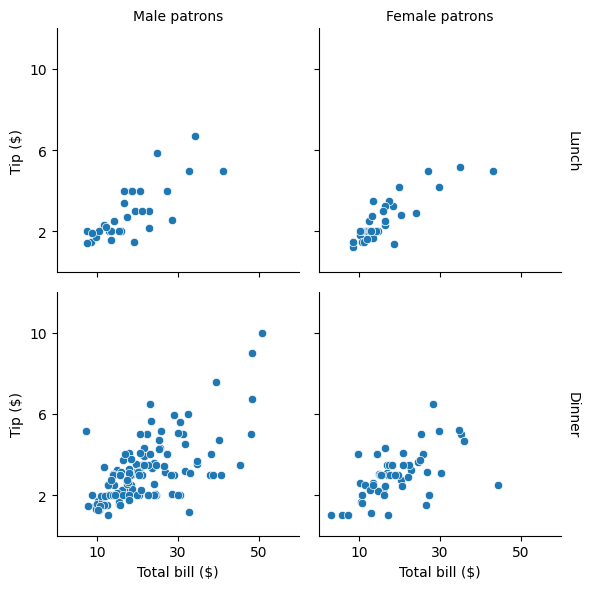

In [ ]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill ($)", "Tip ($)")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
g.savefig("facet_plot.png")

You also have access to the underlying matplotlib objects for additional tweaking:



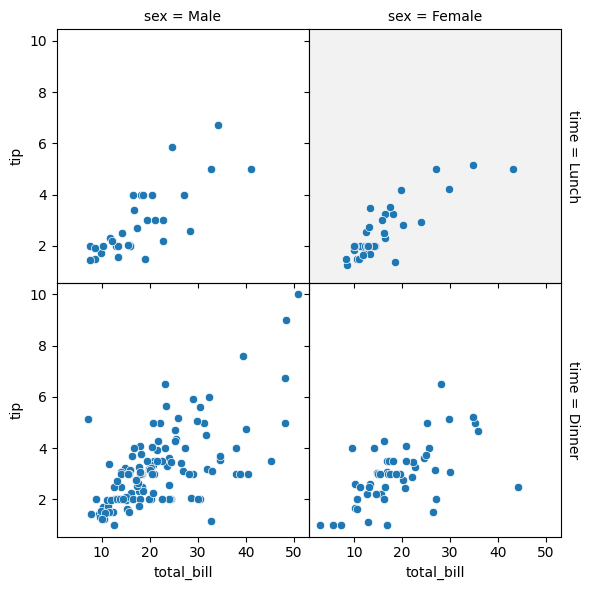

In [ ]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.figure.subplots_adjust(wspace=0, hspace=0)
for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == "Lunch" and col_val == "Female":
        ax.set_facecolor(".95")
    else:
        ax.set_facecolor((0, 0, 0, 0))

## Aditional Examples

In [ ]:
# Load the 'mpg' dataset
mpg = sns.load_dataset('mpg')

In [ ]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


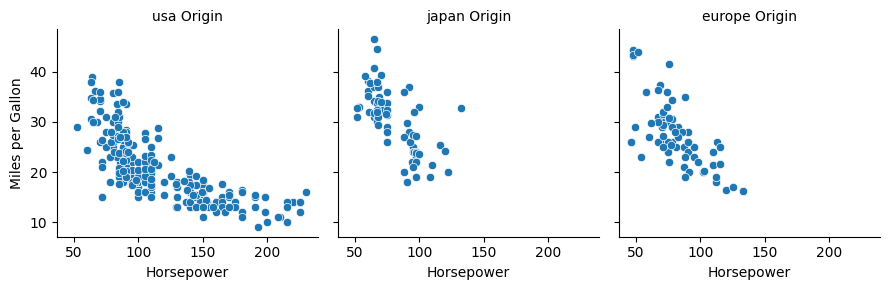

In [ ]:
# Create a faceted grid of scatter plots: Horsepower vs. MPG
facet = sns.FacetGrid(mpg, col="origin")
facet.map(sns.scatterplot, "horsepower", "mpg")

# Add titles and labels
facet.set_axis_labels("Horsepower", "Miles per Gallon")
facet.set_titles("{col_name} Origin")

# Show the plot
plt.show()


**In this example:**

-   We load the `mpg` dataset, which includes car specifications.
-   We use `FacetGrid` from `seaborn` to create a grid of scatter plots.
-   The data is divided into subsets based on the `origin` variable (USA, Europe, Japan).
-   For each subset, a scatter plot of `horsepower` vs. `mpg` is created.
-   Titles and labels are added to make the plots more readable.

The resulting faceted grid will show separate scatter plots for cars from the USA, Europe, and Japan, allowing you to compare the relationship between horsepower and miles per gallon across different origins.

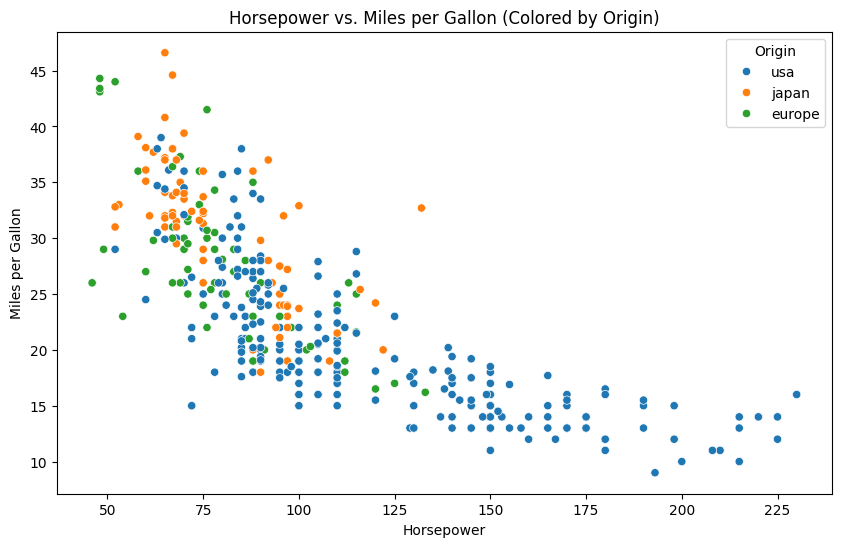

In [ ]:

# Create a single scatter plot of Horsepower vs. MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="origin")
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon")
plt.title("Horsepower vs. Miles per Gallon (Colored by Origin)")
plt.legend(title="Origin")
plt.show()


### Comparison

1.  **Without Faceting**:
    
    -   All data points are plotted in a single scatter plot.
    -   Different origins are distinguished by color.
    -   This allows for a quick overall comparison but can become cluttered if there are many data points or categories.
2.  **With Faceting**:
    
    -   Data points are divided into separate scatter plots based on the `origin` variable.
    -   Each plot focuses on a specific origin, making it easier to see patterns and trends within each subset.
    -   This approach provides a clearer comparison between categories without the clutter of overlapping points.

By plotting with and without faceting, you can see how faceting helps to declutter the visualization and provides more focused insights into the data subsets.

## Let's explore two more examples using different plot types to illustrate faceting:

### Example 1: Bar Plot
Example 1: Bar Plot
We'll use the tips dataset to create bar plots comparing the average tip amount by day for different times (Lunch and Dinner).

**Plotting without Faceting**

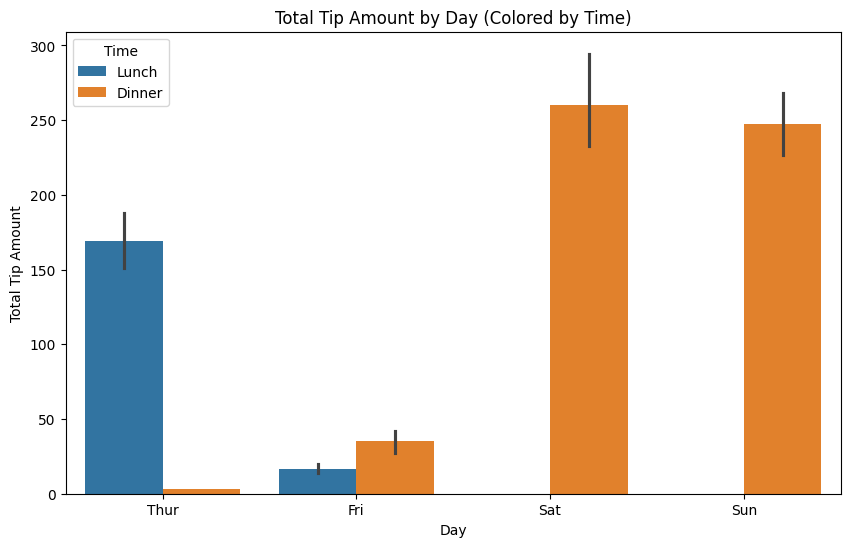

In [ ]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Create a single bar plot of average tip amount by day, colored by time
plt.figure(figsize=(10, 6))
sns.barplot(data=tips, x="day", y="tip", hue="time", estimator=sum)
plt.xlabel("Day")
plt.ylabel("Total Tip Amount")
plt.title("Total Tip Amount by Day (Colored by Time)")
plt.legend(title="Time")
plt.show()

**Plotting with Faceting**


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


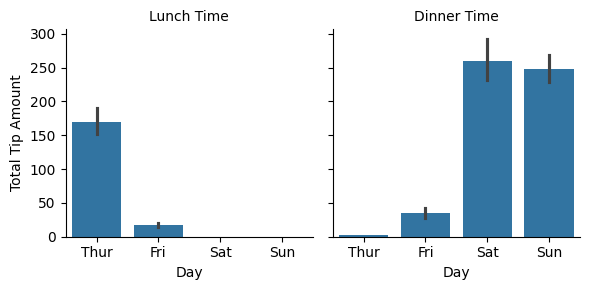

In [ ]:
# Create a faceted grid of bar plots: Total tip amount by day
facet = sns.FacetGrid(tips, col="time")
facet.map(sns.barplot, "day", "tip", estimator=sum)

# Add titles and labels
facet.set_axis_labels("Day", "Total Tip Amount")
facet.set_titles("{col_name} Time")

# Show the plot
plt.show()

**Example 2: Histogram**
We'll use the iris dataset to create histograms comparing the distribution of petal lengths for different species of iris flowers.

**Plotting without Faceting**


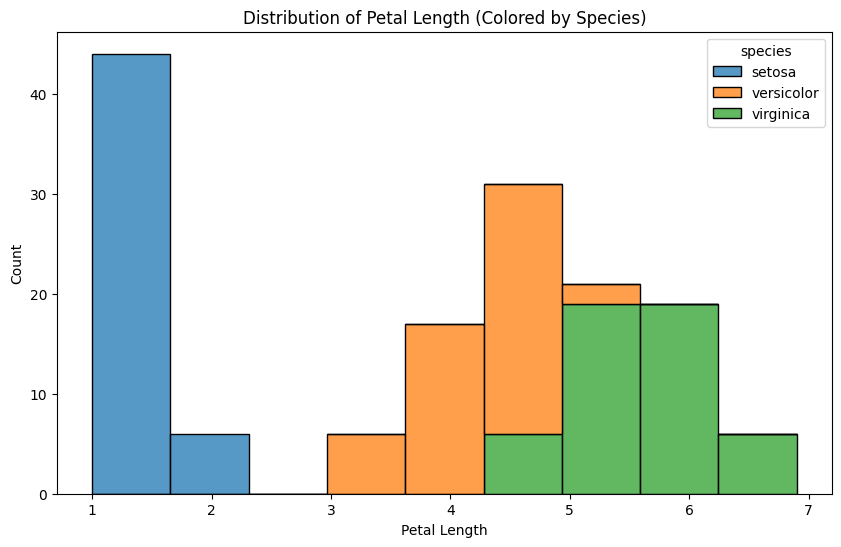

In [ ]:
# Load the 'iris' dataset
iris = sns.load_dataset('iris')

# Create a single histogram of petal length, colored by species
plt.figure(figsize=(10, 6))
sns.histplot(data=iris, x="petal_length", hue="species", multiple="stack")
plt.xlabel("Petal Length")
plt.ylabel("Count")
plt.title("Distribution of Petal Length (Colored by Species)")
plt.show()

### Comparison

1.  **Bar Plot Example**:
    
    -   Without Faceting: A single bar plot shows the total tip amount by day, with different times (Lunch and Dinner) distinguished by color. This can be useful but might get cluttered if the data has many categories.
    -   With Faceting: Separate bar plots for Lunch and Dinner allow for a clearer comparison of total tips by day within each time category.
2.  **Histogram Example**:
    
    -   Without Faceting: A single histogram shows the distribution of petal lengths, with different species distinguished by color. This can help see overall trends but might obscure details.
    -   With Faceting: Separate histograms for each species allow for a more detailed comparison of petal length distributions within each species.

These examples demonstrate how faceting can be a powerful tool for visualizing and comparing subsets of data across different categories in a clear and organized manner.

**Plotting with Faceting**


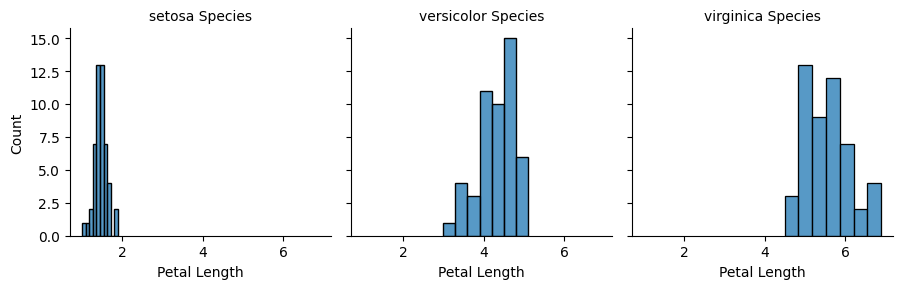

In [ ]:
# Create a faceted grid of histograms: Petal length distribution
facet = sns.FacetGrid(iris, col="species")
facet.map(sns.histplot, "petal_length")

# Add titles and labels
facet.set_axis_labels("Petal Length", "Count")
facet.set_titles("{col_name} Species")

# Show the plot
plt.show()

### Comparison

1.  **Bar Plot Example**:
    
    -   Without Faceting: A single bar plot shows the total tip amount by day, with different times (Lunch and Dinner) distinguished by color. This can be useful but might get cluttered if the data has many categories.
    -   With Faceting: Separate bar plots for Lunch and Dinner allow for a clearer comparison of total tips by day within each time category.
2.  **Histogram Example**:
    
    -   Without Faceting: A single histogram shows the distribution of petal lengths, with different species distinguished by color. This can help see overall trends but might obscure details.
    -   With Faceting: Separate histograms for each species allow for a more detailed comparison of petal length distributions within each species.

These examples demonstrate how faceting can be a powerful tool for visualizing and comparing subsets of data across different categories in a clear and organized manner.